# Heiken Ashi

https://www.investopedia.com/trading/heikin-ashi-better-candlestick/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore") 

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-10-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-01,227.949997,229.419998,226.350006,227.259995,225.502670,23600800
2018-10-02,227.250000,230.000000,226.630005,229.279999,227.507050,24788200
2018-10-03,230.050003,233.470001,229.779999,232.070007,230.275482,28654800
2018-10-04,230.779999,232.350006,226.729996,227.990005,226.227036,32042000
2018-10-05,227.960007,228.410004,220.580002,224.289993,222.555634,33580500


In [3]:
def Heiken_Ashi(df):
    df['HA_Close']=(df['Open']+ df['High']+ df['Low']+ df['Close'])/4
    df['HA_Open']=(df['Open']+df['Close'])/2   
    
    for i in range(1, len(df)):
        df['HA_Open'][i]=(df['HA_Open'][i-1]+df['HA_Close'][i-1])/2 
    df['HA_High']=df[['HA_Open','HA_Close','High']].max(axis=1)
    df['HA_Low']=df[['HA_Open','HA_Close','Low']].min(axis=1)
    return

Heiken_Ashi(df)

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,HA_Close,HA_Open,HA_High,HA_Low
Date,,,,,,,,,,
2018-10-01,227.949997,229.419998,226.350006,227.259995,225.502670,23600800,227.744999,227.604996,229.419998,226.350006
2018-10-02,227.250000,230.000000,226.630005,229.279999,227.507050,24788200,228.290001,227.674998,230.000000,226.630005
2018-10-03,230.050003,233.470001,229.779999,232.070007,230.275482,28654800,231.342503,227.982499,233.470001,227.982499
2018-10-04,230.779999,232.350006,226.729996,227.990005,226.227036,32042000,229.462502,229.662501,232.350006,226.729996
2018-10-05,227.960007,228.410004,220.580002,224.289993,222.555634,33580500,225.310001,229.562501,229.562501,220.580002


In [5]:
HA = df[['HA_Open','HA_High','HA_Low','HA_Close', 'Volume']]

In [6]:
HA.head()

,HA_Open,HA_High,HA_Low,HA_Close,Volume
Date,,,,,
2018-10-01,227.604996,229.419998,226.350006,227.744999,23600800
2018-10-02,227.674998,230.000000,226.630005,228.290001,24788200
2018-10-03,227.982499,233.470001,227.982499,231.342503,28654800
2018-10-04,229.662501,232.350006,226.729996,229.462502,32042000
2018-10-05,229.562501,229.562501,220.580002,225.310001,33580500


In [7]:
from matplotlib import dates as mdates
import datetime as dt

dfc = HA.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,HA_Open,HA_High,HA_Low,HA_Close,Volume
0,736968.0,227.604996,229.419998,226.350006,227.744999,23600800
1,736969.0,227.674998,230.000000,226.630005,228.290001,24788200
2,736970.0,227.982499,233.470001,227.982499,231.342503,28654800
3,736971.0,229.662501,232.350006,226.729996,229.462502,32042000
4,736972.0,229.562501,229.562501,220.580002,225.310001,33580500


Text(0.5,0,'Date')

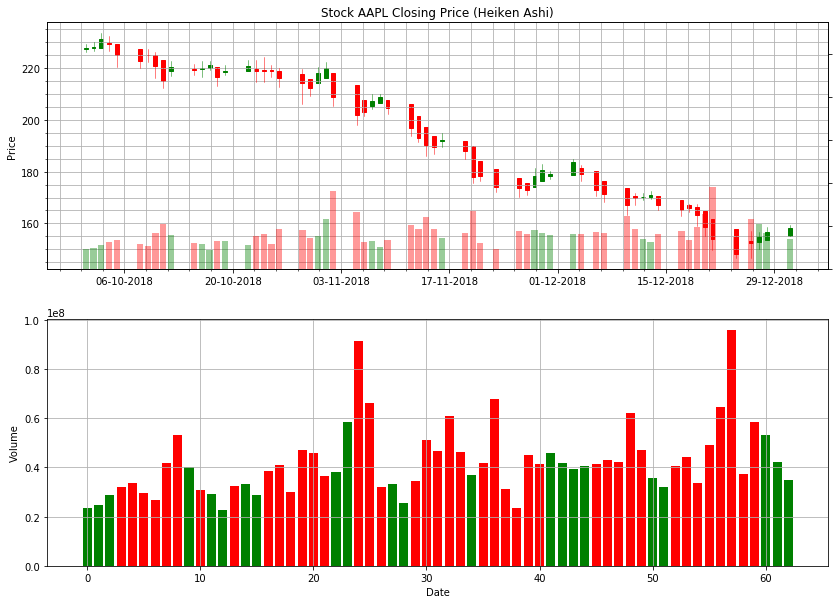

In [10]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
dfc['VolumePositive'] = dfc['HA_Open'] < dfc['HA_Close']
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price (Heiken Ashi)')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.bar(dfc.index, dfc['Volume'], color=dfc.VolumePositive.map({True: 'g', False: 'r'}))
ax2.grid()
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')

## Compare Heiken Ashi and Candlesticks

In [11]:
from matplotlib import dates as mdates
import datetime as dt

cs = df.reset_index()
cs['Date'] = mdates.date2num(cs['Date'].astype(dt.date))
cs.head()

,Date,Open,High,Low,Close,Adj Close,Volume,HA_Close,HA_Open,HA_High,HA_Low
0,736968.0,227.949997,229.419998,226.350006,227.259995,225.502670,23600800,227.744999,227.604996,229.419998,226.350006
1,736969.0,227.250000,230.000000,226.630005,229.279999,227.507050,24788200,228.290001,227.674998,230.000000,226.630005
2,736970.0,230.050003,233.470001,229.779999,232.070007,230.275482,28654800,231.342503,227.982499,233.470001,227.982499
3,736971.0,230.779999,232.350006,226.729996,227.990005,226.227036,32042000,229.462502,229.662501,232.350006,226.729996
4,736972.0,227.960007,228.410004,220.580002,224.289993,222.555634,33580500,225.310001,229.562501,229.562501,220.580002


In [12]:
cs = cs[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

Text(0.5,0,'Date')

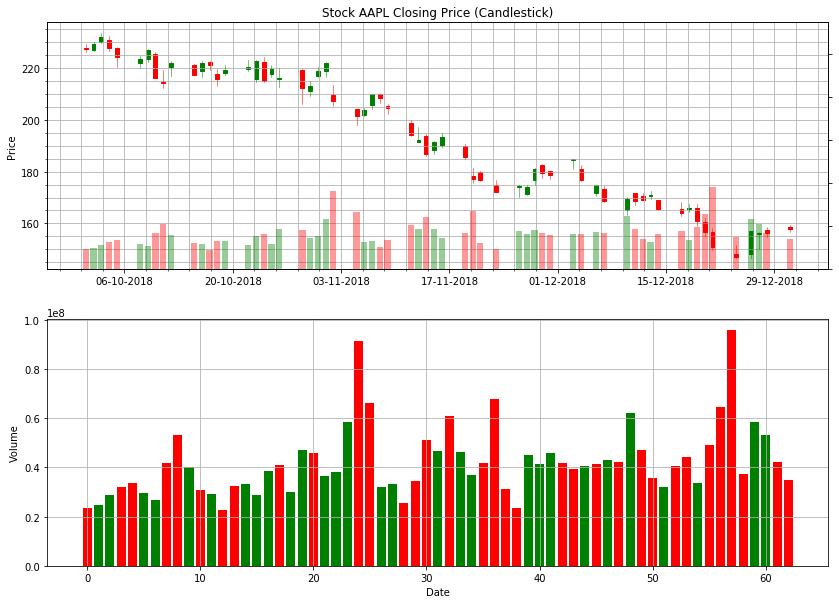

In [17]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,cs.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
cs['VolumePositive'] = cs['Open'] < cs['Close']
colors = cs.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(cs.Date, cs['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*cs.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price (Candlestick)')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.bar(cs.index, cs['Volume'], color=cs.VolumePositive.map({True: 'g', False: 'r'}))
ax2.grid()
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')

Text(0.5,0,'Date')

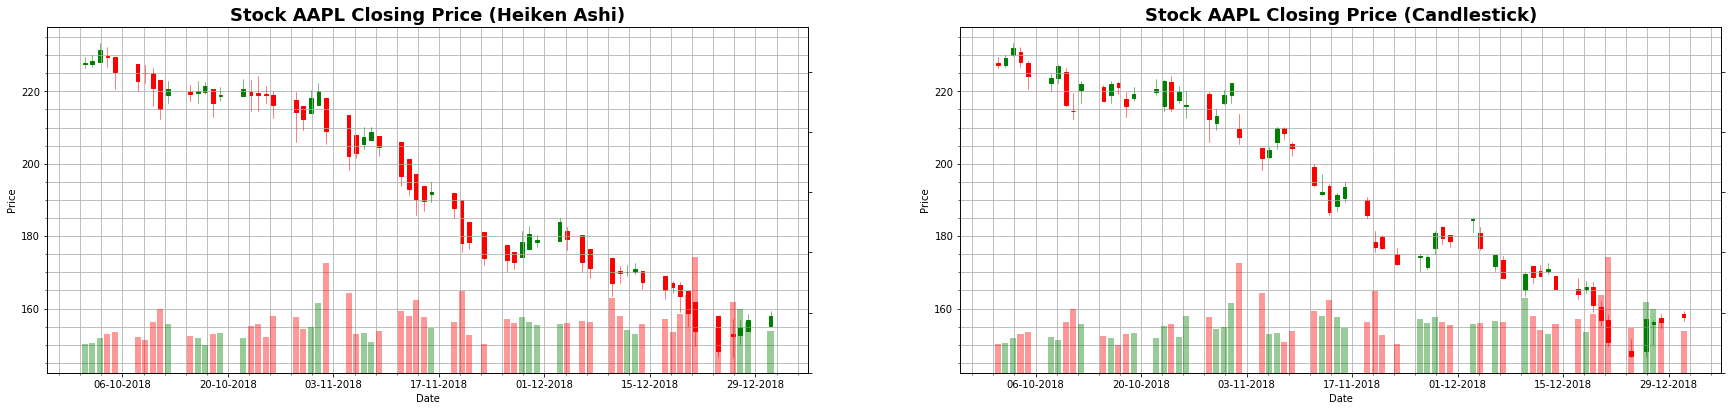

In [36]:
fig = plt.figure(figsize=(30,14))
ax1 = plt.subplot(2, 2, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
dfc['VolumePositive'] = dfc['HA_Open'] < dfc['HA_Close']
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price (Heiken Ashi)', fontweight="bold", fontsize=18)
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

ax2 = plt.subplot(2, 2, 2)
candlestick_ohlc(ax2,cs.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax2.xaxis_date()
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.grid(True, which='both')
ax2.minorticks_on()
ax2v = ax2.twinx()
cs['VolumePositive'] = cs['Open'] < cs['Close']
colors = cs.VolumePositive.map({True: 'g', False: 'r'})
ax2v.bar(cs.Date, cs['Volume'], color=colors, alpha=0.4)
ax2v.axes.yaxis.set_ticklabels([])
ax2v.set_ylim(0, 3*cs.Volume.max())
ax2.set_title('Stock '+ symbol +' Closing Price (Candlestick)', fontweight="bold", fontsize=18)
ax2.set_ylabel('Price')
ax2.set_xlabel('Date')